In [1]:
import pandas as pd
import numpy as np

### Data Loading and Understanding the Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(4209, 378)

In [5]:
test_data.shape

(4209, 377)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
nullcheck = train_data.isnull().sum()
nullcheck[nullcheck > 0]

Series([], dtype: int64)

In [8]:
nullcheck = test_data.isnull().sum()
nullcheck[nullcheck > 0]

Series([], dtype: int64)

#### Checking column(s) Variance, if the variance is equal to zero, then need to remove those variable(s).

In [9]:
column_var = train_data.var()
column_var_zero = column_var[column_var == 0]
print(column_var_zero)

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64


In [10]:
for i in column_var_zero.index:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

print(train_data.shape)
print(test_data.shape)

(4209, 366)
(4209, 365)


## Analysing the Target Varible

In [11]:
train_data['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

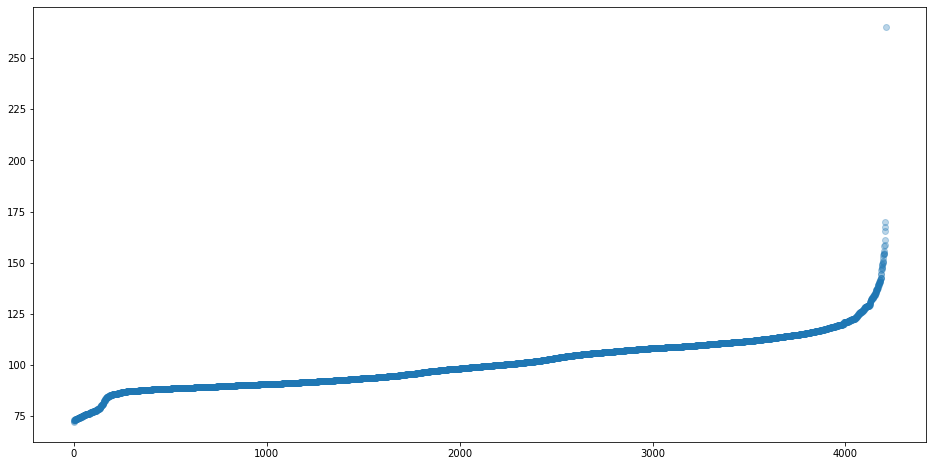

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(x=range(len(train_data)), y=np.sort(train_data.y.values), alpha=0.3)

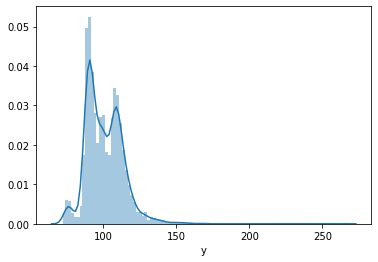

In [14]:
sns.distplot(train_data.y, bins=100)

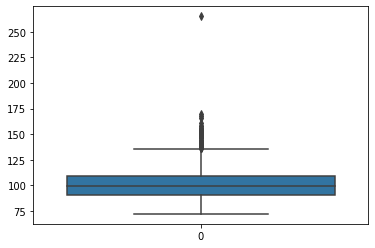

In [15]:
sns.boxplot(data=train_data.y)

Setting the threshold for y as 180. Droping if y > threshold

In [16]:
y_threshold = 180
train_data = train_data[train_data['y'] < y_threshold]
print(train_data.shape)

(4208, 366)


### Analysis of Categorical Features

In [17]:
cat_cols = []
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        cat_cols.append(col)
    
cat_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

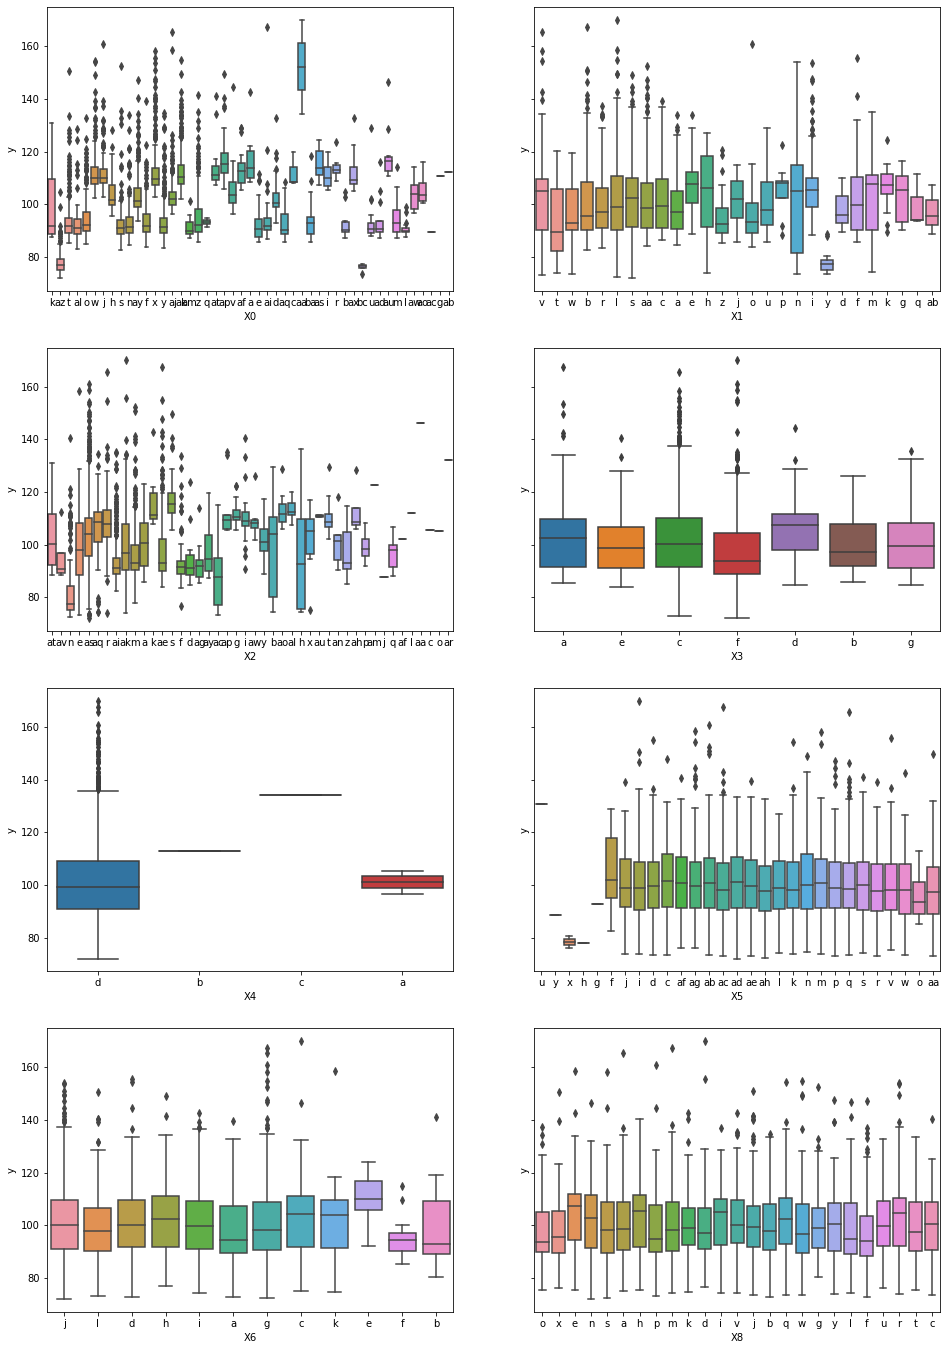

In [18]:
fig, axs = plt.subplots(4,2, sharey=True, figsize=(16,24) )
r,c,i = 0,0,len(cat_cols)
for col in cat_cols:
    sns.boxplot(x=col, y='y', data=train_data, ax=axs[r][c])
    i -= 1
    c = i%2
    if c == 0:
        r += 1

X4 has low very low variance, we can remove it.

#### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in cat_cols:
    lEnc = LabelEncoder()
    lEnc.fit(list(train_data[col].values) + list(test_data[col].values))
    train_data[col] = lEnc.transform(train_data[col])
    test_data[col] = lEnc.transform(test_data[col])

In [21]:
for col in cat_cols:
    print(col, ' :',train_data[col].var())

X0  : 230.71958417800764
X1  : 72.78048603585651
X2  : 135.79571956389896
X3  : 3.0269856232731795
X4  : 0.005462503197188894
X5  : 77.67868666291628
X6  : 8.506572819969525
X8  : 49.53066222012703


Here also we can see that X4 has Low Variance, So we can drop it.

In [22]:
train_data.drop(['X4'], axis=1, inplace=True)
test_data.drop(['X4'], axis=1, inplace=True)

In [23]:
train_data.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_data.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,38,5,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,9,0,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,19,5,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,38,5,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,19,2,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
train_data.drop(['ID'], axis=1, inplace=True)
test_data.drop(['ID'], axis=1, inplace=True)

In [26]:
print(train_data.shape)
print(test_data.shape)

(4208, 364)
(4209, 363)


In [27]:
X = train_data.drop('y', axis=1)
Y = train_data['y'].values

### Dimensionality reduction

In [28]:
from sklearn.decomposition import PCA

In [29]:
n_comp = 15
pca = PCA(n_components=n_comp, random_state=101)
pca_train_data = pca.fit_transform(X)
pca_test_data = pca.transform(test_data)

In [30]:
pca_train_data.shape

(4208, 15)

### Model Training

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [32]:
xgb = XGBRegressor(n_estimators=600,
            max_depth=6,
            learning_rate=0.01,
            random_state=101,
            min_child_weight=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=101)


In [33]:
from sklearn.metrics import r2_score

In [34]:
sps = kfold.split(pca_train_data, y=Y)

for train, test in sps:
    xgb.fit(pca_train_data[train], Y[train])
    print(r2_score(Y[test], xgb.predict(pca_train_data[test])))

0.50929524123537
0.4461743552525812
0.5495015357196538
0.522390594368133
0.47026981844020244


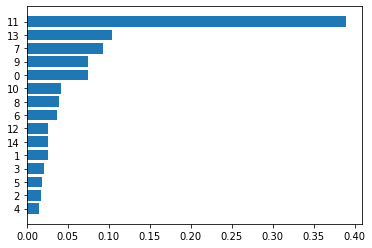

In [35]:
feat_imp = pd.DataFrame({'pca_comp':range(pca_train_data.shape[1]), 'imp': xgb.feature_importances_})
feat_imp = feat_imp.sort_values('imp')

plt.barh(range(pca_train_data.shape[1]), feat_imp['imp'])
plt.yticks(range(pca_train_data.shape[1]), feat_imp['pca_comp'])
plt.show()

### Train data + PCA

In [36]:
for i in range(n_comp):
    X['pca_'+str(i)] = pca_train_data[:,i]
    test_data['pca_'+str(i)] = pca_test_data[:,i]
    
X.shape

(4208, 378)

In [37]:
xgb2 = XGBRegressor(n_estimators=600,
            max_depth=6,
            learning_rate=0.01,
            random_state=101,
            min_child_weight=1)

ksplits = kfold.split(X, y=Y)

for train, test in ksplits:
    xgb2.fit(X.iloc[train], Y[train])
    print(r2_score(Y[test], xgb2.predict(X.iloc[test])))

0.6246807263271787
0.5302870687249952
0.6185234796830945
0.5905418727337417
0.5339260779488582


In [38]:
feature_imp = pd.DataFrame({'features':list(X.columns), 'fimportance': xgb2.feature_importances_})
feature_imp = feature_imp.sort_values('fimportance')
feature_imp = feature_imp[feature_imp['fimportance']>0]

len(feature_imp)

158

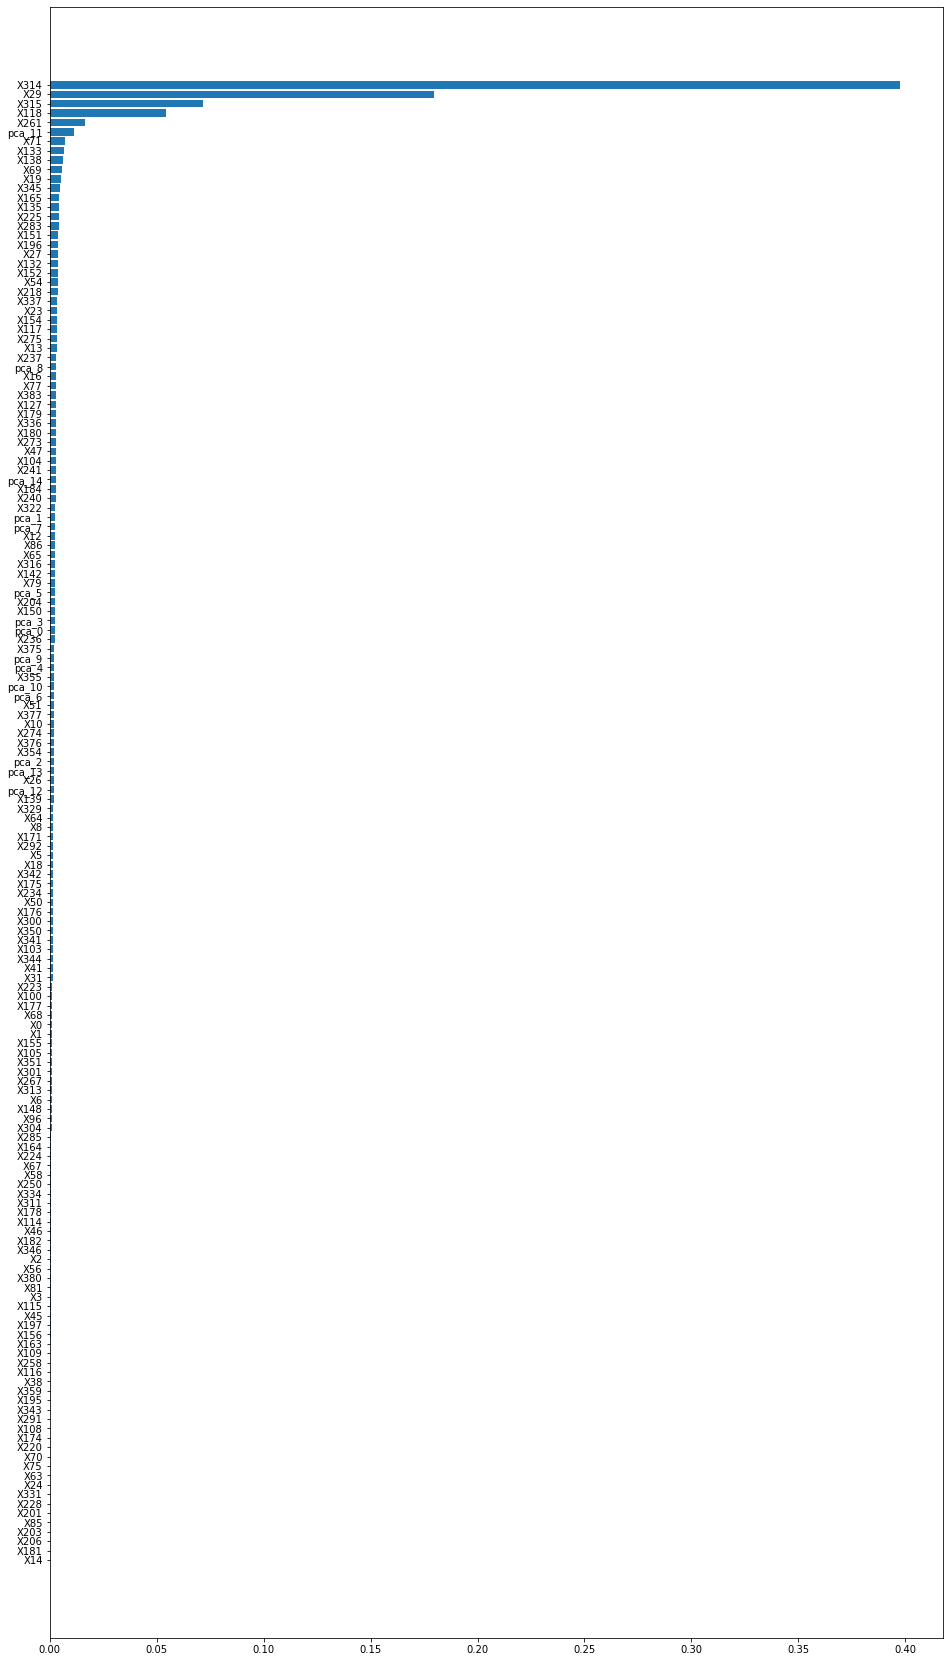

In [39]:
plt.figure(figsize=(16,30))
plt.barh(range(len(feature_imp)), feature_imp['fimportance'])
plt.yticks(range(len(feature_imp)), feature_imp.features)
plt.show()

### Predicting Test time for Test data.

In [40]:
test_pred = xgb2.predict(test_data)

In [41]:
test_pred

array([ 85.579346, 102.61905 ,  86.329765, ...,  92.420616, 111.9709  ,
        90.913025], dtype=float32)